# Weather in Szeged 2006-2016
<p>Hourly/daily summary with temperature, pressure, wind speed and more</p>
<p>This notebook has been taken from kaggle <a>https://www.kaggle.com/budincsevity/szeged-weather</a>.The data available in this notebook is related to hourly/daily summary for Szeged, Hungary area, between 2006 and 2016
        <ul>Features in the dataset : 
            <li>time</li>
            <li>summary</li>
            <li>precipType</li>
            <li>temperature</li>
            <li>apparentTemperature</li>
            <li>humidity</li>
            <li>windSpeed</li>
            <li>windBearing</li>
            <li>visibility</li>
            <li>loudCover</li>
            <li>pressure</li>
        </ul>
<p>
<p>This is the implementation of a Neural Network applied as a regression to predict the Apparent Temperature</p>
<h3>Welcome!!!</h3>

<h4>Import libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

2.6.0


Import the .CSV file to create the dataframe

In [3]:
wheather_df = pd.read_csv("weatherHistory.csv")
wheather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Let's look the column's type of our data

In [4]:
wheather_df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

<p>The Apparent temperature is derived from a combination of temperature and humidity, for that reason the columns that will be used to predcit will be Humidity and Temperature(C)<p>

In [5]:
# Select temperature and humidity columns
temp_hum_df = wheather_df[["Temperature (C)","Humidity","Apparent Temperature (C)"]]
temp_hum_df.head()

,Temperature (C),Humidity,Apparent Temperature (C)
0,9.472222,0.89,7.388889
1,9.355556,0.86,7.227778
2,9.377778,0.89,9.377778
3,8.288889,0.83,5.944444
4,8.755556,0.83,6.977778


Let's look it theres any null value 

In [6]:
temp_hum_df.isnull().sum()

Temperature (C)             0
Humidity                    0
Apparent Temperature (C)    0
dtype: int64

Now, it´s time to plot and see some statistics to looking for outliers and drop from the data

In [7]:
temp_hum_df.describe()

,Temperature (C),Humidity,Apparent Temperature (C)
count,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.855029
std,9.551546,0.195473,10.696847
min,-21.822222,0.000000,-27.716667
25%,4.688889,0.600000,2.311111
50%,12.000000,0.780000,12.000000
75%,18.838889,0.890000,18.838889
max,39.905556,1.000000,39.344444


Text(0.5, 1.0, 'Temperature (C)')

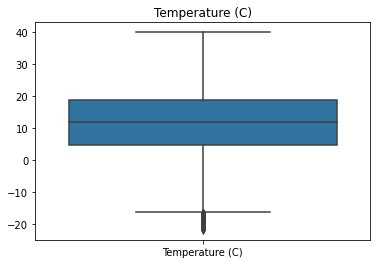

In [12]:
#Box plot temperture
sns.boxplot(data=temp_hum_df.iloc[:,:1]).set_title("Temperature (C)")

Text(0.5, 1.0, 'Apparent Temperature (C) ')

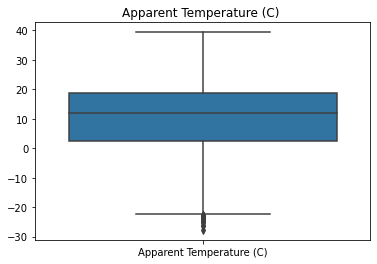

In [15]:
# Box plot Apparent Temperature 
sns.boxplot(data=temp_hum_df.iloc[:,2:3]).set_title("Apparent Temperature (C) ")

Text(0.5, 1.0, 'Humedity')

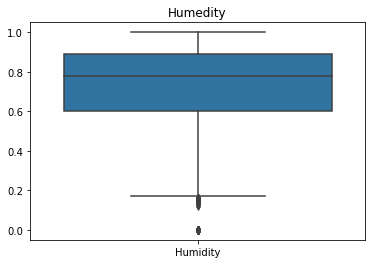

In [16]:
#Box plot Humedity
sns.boxplot(data=temp_hum_df.iloc[:,1:2]).set_title("Humedity")

<h3>Drop the outliers</h3>

In [110]:
#1. Calculate the mean and standard devaition by any feature
mean_temperaure,mean_humidity, mean_apparent_temperature = temp_hum_df.mean()
std_temperaure,std_humidity, std_apparent_temperature = temp_hum_df.std()

#2. use 3 standard deviation from the mean to drop the outliers(cover the 99% of the data)
under_range_humidity = mean_humidity-std_humidity*3
under_range_temperature = mean_temperaure-std_temperaure*3
under_range_apparent_temperature = mean_apparent_temperature-std_apparent_temperature*3

temp_hum_drop_outliers_df = temp_hum_df.loc[(temp_hum_df["Humidity"]>under_range_humidity) & (temp_hum_df["Temperature (C)"]>under_range_temperature)\
                                                & (temp_hum_df["Apparent Temperature (C)"]>under_range_apparent_temperature)]
temp_hum_drop_outliers_df

,Temperature (C),Humidity,Apparent Temperature (C)
0,9.472222,0.89,7.388889
1,9.355556,0.86,7.227778
2,9.377778,0.89,9.377778
3,8.288889,0.83,5.944444
4,8.755556,0.83,6.977778
...,...,...,...
96448,26.016667,0.43,26.016667
96449,24.583333,0.48,24.583333
96450,22.038889,0.56,22.038889
96451,21.522222,0.60,21.522222


Calculate the amount of data removed from the dataset

In [111]:
len(temp_hum_df)-len(temp_hum_drop_outliers_df)

84

plot again and see the data withouth the outliers

In [112]:
temp_hum_drop_outliers_df.describe()

,Temperature (C),Humidity,Apparent Temperature (C)
count,96369.000000,96369.000000,96369.000000
mean,11.954257,0.735078,10.879268
std,9.519954,0.195170,10.662319
min,-16.666667,0.150000,-21.194444
25%,4.733333,0.600000,2.333333
50%,12.016667,0.780000,12.016667
75%,18.838889,0.890000,18.838889
max,39.588889,1.000000,39.344444


Text(0.5, 1.0, 'Temperature (C)')

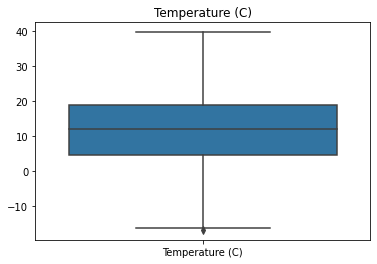

In [113]:
#Box plot temperture
sns.boxplot(data=temp_hum_drop_outliers_df.iloc[:,:1]).set_title("Temperature (C)")

Text(0.5, 1.0, 'Apparent Temperature (C) ')

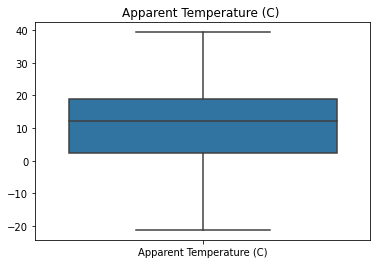

In [114]:
# Box plot Apparent Temperature 
sns.boxplot(data=temp_hum_drop_outliers_df.iloc[:,2:3]).set_title("Apparent Temperature (C) ")

Text(0.5, 1.0, 'Humedity')

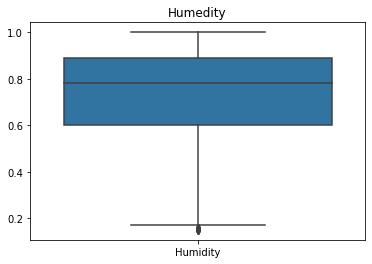

In [115]:
#Box plot Humedity
sns.boxplot(data=temp_hum_drop_outliers_df.iloc[:,1:2]).set_title("Humedity")

Let's find the duplicates rows to eliminate from the data

In [116]:
#Find duplicates columns
temp_hum_drop_outliers_df = temp_hum_drop_outliers_df.drop_duplicates()
temp_hum_drop_outliers_df

,Temperature (C),Humidity,Apparent Temperature (C)
0,9.472222,0.89,7.388889
1,9.355556,0.86,7.227778
2,9.377778,0.89,9.377778
3,8.288889,0.83,5.944444
4,8.755556,0.83,6.977778
...,...,...,...
96446,30.766667,0.28,29.311111
96447,28.838889,0.32,27.850000
96449,24.583333,0.48,24.583333
96450,22.038889,0.56,22.038889


<h3>Time to plot</h3> 

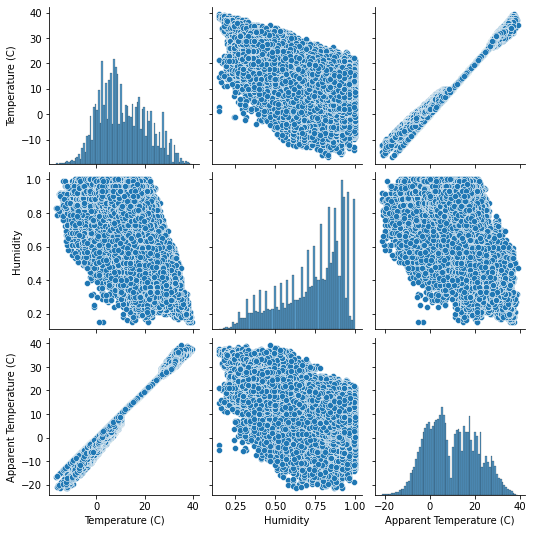

In [117]:
sns.pairplot(temp_hum_drop_outliers_df)

<h3>Determine X and Y to make the predictions</h3>

In [118]:
X = temp_hum_drop_outliers_df.loc[:,["Temperature (C)","Humidity"]]
y = temp_hum_drop_outliers_df.loc[:,["Apparent Temperature (C)"]]

Split the data train and test

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Apply MinMaxScaler from sklearn library to the X values 

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_scaler = scaler.transform(X_train)

Create the model using TensorFlow 

In [125]:
# random seed
tf.random.set_seed(42)

#1. Create a model
wheather_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[2]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
wheather_model.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                      metrics=["mae"])

#3.Fit the model
wheather_model.fit(X_train_scaler, y_train, epochs=10)

Epoch 1/10
1883/1883 [==============================] - 6s 3ms/step - loss: 9.2093 - mae: 9.2093
Epoch 2/10
1883/1883 [==============================] - 6s 3ms/step - loss: 4.3405 - mae: 4.3405A: 0s - loss: 4.4209 - mae: 4.
Epoch 3/10
1883/1883 [==============================] - 4s 2ms/step - loss: 1.5781 - mae: 1.5781
Epoch 4/10
1883/1883 [==============================] - 5s 3ms/step - loss: 0.9992 - mae: 0.9992
Epoch 5/10
1883/1883 [==============================] - 5s 3ms/step - loss: 0.9987 - mae: 0.9987A: 1s -
Epoch 6/10
1883/1883 [==============================] - 5s 3ms/step - loss: 0.9990 - mae: 0.9990
Epoch 7/10
1883/1883 [==============================] - 6s 3ms/step - loss: 0.9995 - mae: 0.9995
Epoch 8/10
1883/1883 [==============================] - 5s 2ms/step - loss: 0.9983 - mae: 0.9983
Epoch 9/10
1883/1883 [==============================] - 5s 3ms/step - loss: 0.9994 - mae: 0.9994
Epoch 10/10
1883/1883 [==============================] - 3s 2ms/step - loss: 0.9987 - mae:

Generating predictions of the model

In [129]:
y_pred = wheather_model.predict(X_test_scaler)

Evaluate the model 

In [130]:
wheather_model.evaluate(X_test_scaler,y_test)

471/471 [==============================] - 2s 4ms/step - loss: 1.0027 - mae: 1.0027


[1.0027098655700684, 1.0027098655700684]

Obtained the R2 score to measures how much variability in dependent variable can be explained by the model.

In [132]:
from sklearn.metrics import r2_score

print(f'R Square Score : {r2_score(y_test, y_pred)}')

R Square Score : 0.9861541096993596


There is a clear relation between Temperature features like anticipated. The plots made in the cells above show that relation. Also, temperature and humidity show a kind of relation.

The decision to implement three standard deviations to delete the outliers was made for the distribution of the features. Both temperature plots have a similar form of normal distribution.

With a considerably low number of epochs used in the model, the R-square score obtained was optimal.

<h3>Thanks!!</h3>